In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
train = train.drop(columns=["period","id","game-ver"])
test = test.drop(columns=["period","id","game-ver"])

In [4]:
train_x = train.drop(["y"],axis=1)
train_y = train["y"]

In [5]:
train_x.head()

,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,A2-level,...,B1-level,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level
0,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,soytuber_custom,NaN,118.0,...,28,hokusai_becchu,NaN,26.0,herocharger_replica,NaN,68.0,sharp_neo,NaN,31.0
1,regular,standard,nawabari,arowana,parashelter_sorella,NaN,198,jetsweeper,NaN,77.0,...,83,squiclean_b,NaN,118.0,campingshelter,NaN,168.0,sputtery_clear,NaN,151.0
2,gachi,standard,hoko,ama,nzap89,a-,114,quadhopper_black,a,68.0,...,50,nzap85,a+,163.0,prime_becchu,a-,160.0,dualsweeper_custom,a,126.0
3,regular,standard,nawabari,engawa,bamboo14mk1,NaN,336,splatroller_becchu,NaN,131.0,...,273,liter4k,NaN,189.0,promodeler_mg,NaN,194.0,hotblaster_custom,NaN,391.0
4,gachi,standard,hoko,chozame,bold_7,x,299,hissen_hue,x,97.0,...,101,sputtery_hue,x,45.0,bucketslosher_soda,x,246.0,wakaba,x,160.0


In [7]:
train.dtypes

lobby-mode     object
lobby          object
mode           object
stage          object
A1-weapon      object
A1-rank        object
A1-level        int64
A2-weapon      object
A2-rank        object
A2-level      float64
A3-weapon      object
A3-rank        object
A3-level      float64
A4-weapon      object
A4-rank        object
A4-level      float64
B1-weapon      object
B1-rank        object
B1-level        int64
B2-weapon      object
B2-rank        object
B2-level      float64
B3-weapon      object
B3-rank        object
B3-level      float64
B4-weapon      object
B4-rank        object
B4-level      float64
y               int64
dtype: object

array(['5.0.1'], dtype=object)

ランク

In [8]:
all_data = pd.concat([train_x, test],ignore_index = True)

In [9]:
a = []
for c in ["A1-rank", "A2-rank", "A3-rank","A4-rank","B1-rank","B2-rank","B3-rank","B4-rank"]:
    a.append(all_data[c].unique())
print(a)

[array([nan, 'a-', 'x', 's', 'b', 's+', 'a+', 'c+', 'b+', 'b-', 'a', 'c-',
       'c'], dtype=object), array([nan, 'a', 'x', 's', 'b-', 's+', 'a+', 'c', 'a-', 'c+', 'b+', 'b',
       'c-'], dtype=object), array([nan, 'a', 'x', 's', 'b', 's+', 'a+', 'c+', 'a-', 'b-', 'c', 'b+',
       'c-'], dtype=object), array([nan, 'a', 'x', 's', 'b-', 's+', 'c+', 'a+', 'a-', 'b+', 'c', 'b',
       'c-'], dtype=object), array([nan, 'a-', 'x', 's', 'b-', 's+', 'c', 'a+', 'a', 'b+', 'c-', 'b',
       'c+'], dtype=object), array([nan, 'a+', 'x', 's', 'b-', 's+', 'c', 'a-', 'a', 'b+', 'c+', 'b',
       'c-'], dtype=object), array([nan, 'a-', 'x', 's', 'b', 's+', 'a+', 'c', 'a', 'b+', 'b-', 'c+',
       'c-'], dtype=object), array([nan, 'a', 'x', 's', 'b-', 's+', 'a-', 'c-', 'a+', 'b', 'b+', 'c+',
       'c'], dtype=object)]


In [10]:
for c in ["A1-rank", "A2-rank", "A3-rank","A4-rank","B1-rank","B2-rank","B3-rank","B4-rank"]:
    all_data[c] = all_data[c].str.replace("c-", "0",regex = False)
    all_data[c] = all_data[c].str.replace("c+", "2",regex = False)
    all_data[c] = all_data[c].str.replace("b-", "3",regex = False)
    all_data[c] = all_data[c].str.replace("b+", "5",regex = False)
    all_data[c] = all_data[c].str.replace("a-", "6",regex = False)
    all_data[c] = all_data[c].str.replace("a+", "8",regex = False)
    all_data[c] = all_data[c].str.replace("s-", "9",regex = False)
    all_data[c] = all_data[c].str.replace("s+", "11",regex = False)

In [11]:
for c in ["A1-rank", "A2-rank", "A3-rank","A4-rank","B1-rank","B2-rank","B3-rank","B4-rank"]:
    all_data[c] = all_data[c].str.replace("x", "12")
    all_data[c] = all_data[c].str.replace("c", "1")
    all_data[c] = all_data[c].str.replace("b", "4")
    all_data[c] = all_data[c].str.replace("a", "7")
    all_data[c] = all_data[c].str.replace("s", "10")

In [12]:
for c in ["A1-rank", "A2-rank", "A3-rank","A4-rank","B1-rank","B2-rank","B3-rank","B4-rank"]:
    all_data[c] =  pd.to_numeric(all_data[c],downcast='signed')

In [13]:
a = []
for c in ["A1-weapon", "A2-weapon", "A3-weapon","A4-weapon","B1-weapon","B2-weapon","B3-weapon","B4-weapon"]:
    a.append(len(all_data[c].unique()))
print(a)

[139, 139, 139, 140, 139, 139, 140, 140]


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in ["A1-weapon", "A2-weapon", "A3-weapon","A4-weapon","B1-weapon","B2-weapon","B3-weapon","B4-weapon"]:
    le.fit(all_data[c].fillna("NA"))
    all_data[c] = le.transform(all_data[c].fillna("NA"))

In [15]:
a = []
for c in ["A1-weapon", "A2-weapon", "A3-weapon","A4-weapon","B1-weapon","B2-weapon","B3-weapon","B4-weapon"]:
    a.append(len(all_data[c].unique()))
print(a)

[139, 139, 139, 140, 139, 139, 140, 140]


In [16]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

In [37]:
all_data["A_member"] = 4
all_data["B_member"] = 4

In [27]:
all_data["A4-level"].isnull().sum()

66

In [34]:
all_data["B4-level"].isnull().sum()

97

In [36]:
all_data["B3-level"].isnull().sum()

2

In [39]:
for i in range(len(all_data)):
    if pd.isnull(all_data.at[i,"A4-level"]):
        all_data.at[i,"A_member"]=3
    if pd.isnull(all_data.at[i,"B4-level"]):
        all_data.at[i,"B_member"]=3

In [40]:
for i in range(len(all_data)):
    if pd.isnull(all_data.at[i,"B3-level"]):
        all_data.at[i,"B_member"]=2

array([4, 3, 2], dtype=int64)

In [29]:
all_data[all_data["A4-level"].isnull()]

,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,A2-level,...,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,A_member
326,gachi,standard,area,anchovy,33,12.0,394,138,12.0,85.0,...,17,12.0,226.0,56,12.0,145.0,5,NaN,NaN,4
402,regular,standard,nawabari,chozame,41,NaN,46,117,NaN,224.0,...,95,NaN,103.0,77,NaN,43.0,88,NaN,53.0,4
796,gachi,standard,asari,zatou,93,11.0,183,83,11.0,63.0,...,85,11.0,106.0,56,11.0,413.0,94,11.0,162.0,4
1096,gachi,standard,yagura,kombu,93,11.0,233,73,11.0,74.0,...,95,11.0,91.0,126,11.0,146.0,116,11.0,97.0,4
2629,gachi,standard,asari,ajifry,0,12.0,293,55,12.0,122.0,...,135,12.0,127.0,11,12.0,292.0,97,12.0,198.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85205,gachi,standard,yagura,battera,70,12.0,130,105,12.0,220.0,...,84,12.0,136.0,30,12.0,198.0,80,12.0,289.0,4
86549,gachi,standard,asari,ajifry,93,11.0,192,84,11.0,89.0,...,27,11.0,155.0,122,11.0,125.0,110,11.0,177.0,4
87992,regular,standard,nawabari,fujitsubo,98,NaN,199,82,NaN,68.0,...,52,NaN,65.0,67,NaN,129.0,41,NaN,177.0,4
91304,regular,standard,nawabari,zatou,93,NaN,151,115,NaN,9.0,...,74,NaN,164.0,78,NaN,184.0,73,NaN,196.0,4


In [ ]:
all_data["B_member"] = 

In [18]:
all_data.isnull().sum()

lobby-mode        0
lobby             0
mode              0
stage             0
A1-weapon         0
A1-rank       20716
A1-level          0
A2-weapon         0
A2-rank       20716
A2-level          0
A3-weapon         0
A3-rank       20716
A3-level          0
A4-weapon         0
A4-rank       20767
A4-level         66
B1-weapon         0
B1-rank       20716
B1-level          0
B2-weapon         0
B2-rank       20716
B2-level          0
B3-weapon         0
B3-rank       20717
B3-level          2
B4-weapon         0
B4-rank       20798
B4-level         97
A_member          0
dtype: int64

In [20]:
train.isnull().sum()

lobby-mode        0
lobby             0
mode              0
stage             0
A1-weapon         0
A1-rank       14444
A1-level          0
A2-weapon         0
A2-rank       14444
A2-level          0
A3-weapon         0
A3-rank       14444
A3-level          0
A4-weapon         0
A4-rank       14487
A4-level         51
B1-weapon         0
B1-rank       14444
B1-level          0
B2-weapon         0
B2-rank       14444
B2-level          0
B3-weapon         0
B3-rank       14444
B3-level          1
B4-weapon         0
B4-rank       14501
B4-level         67
dtype: int64

In [17]:
train.isnull().sum()

game-ver          0
lobby-mode        0
lobby             0
mode              0
stage             0
A1-weapon         0
A1-rank       14444
A1-level          0
A2-weapon         0
A2-rank       14444
A2-level          0
A3-weapon         0
A3-rank       14444
A3-level          0
A4-weapon        51
A4-rank       14487
A4-level         51
B1-weapon         0
B1-rank       14444
B1-level          0
B2-weapon         0
B2-rank       14444
B2-level          0
B3-weapon         1
B3-rank       14444
B3-level          1
B4-weapon        67
B4-rank       14501
B4-level         67
y                 0
dtype: int64

In [28]:
train.head()

,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,...,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,y
0,5.0.1,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,soytuber_custom,NaN,...,hokusai_becchu,NaN,26.0,herocharger_replica,NaN,68.0,sharp_neo,NaN,31.0,1
1,5.0.1,regular,standard,nawabari,arowana,parashelter_sorella,NaN,198,jetsweeper,NaN,...,squiclean_b,NaN,118.0,campingshelter,NaN,168.0,sputtery_clear,NaN,151.0,0
2,5.0.1,gachi,standard,hoko,ama,nzap89,a-,114,quadhopper_black,a,...,nzap85,a+,163.0,prime_becchu,a-,160.0,dualsweeper_custom,a,126.0,0
3,5.0.1,regular,standard,nawabari,engawa,bamboo14mk1,NaN,336,splatroller_becchu,NaN,...,liter4k,NaN,189.0,promodeler_mg,NaN,194.0,hotblaster_custom,NaN,391.0,0
4,5.0.1,gachi,standard,hoko,chozame,bold_7,x,299,hissen_hue,x,...,sputtery_hue,x,45.0,bucketslosher_soda,x,246.0,wakaba,x,160.0,1


In [35]:
a = train[train["A4-weapon"].isnull()]

In [33]:
pd.set_option('display.max_columns', 100)

In [42]:
a.head()

,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,A2-level,A3-weapon,A3-rank,A3-level,A4-weapon,A4-rank,A4-level,B1-weapon,B1-rank,B1-level,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,y
326,5.0.1,gachi,standard,area,anchovy,furo,x,394,wakaba,x,85.0,nova,x,387.0,NaN,NaN,NaN,momiji,x,258,bucketslosher_deco,x,226.0,hydra_custom,x,145.0,NaN,NaN,NaN,1
402,5.0.1,regular,standard,nawabari,chozame,heromaneuver_replica,NaN,46,splatroller_collabo,NaN,224.0,maneuver_collabo,NaN,20.0,NaN,NaN,NaN,96gal,NaN,152,promodeler_mg,NaN,103.0,momiji,NaN,43.0,pablo,NaN,53.0,1
796,5.0.1,gachi,standard,asari,zatou,prime_becchu,s+,183,nzap85,s+,63.0,splatscope,s+,170.0,NaN,NaN,NaN,sshooter_collabo,s+,172,ochiba,s+,106.0,hydra_custom,s+,413.0,prime_becchu,s+,162.0,0
1096,5.0.1,gachi,standard,yagura,kombu,prime_becchu,s+,233,maneuver,s+,74.0,sputtery_hue,s+,252.0,NaN,NaN,NaN,dualsweeper_custom,s+,143,promodeler_mg,s+,91.0,sputtery_clear,s+,146.0,splatroller,s+,97.0,0
2629,5.0.1,gachi,standard,asari,ajifry,52gal,x,293,hydra_custom,x,122.0,wakaba,x,195.0,NaN,NaN,NaN,dualsweeper_custom,x,223,sshooter_collabo,x,127.0,barrelspinner_remix,x,292.0,promodeler_pg,x,198.0,0


In [45]:
a = test[test["B3-weapon"].isnull()]

In [46]:
a.head()

,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,A2-level,A3-weapon,A3-rank,A3-level,A4-weapon,A4-rank,A4-level,B1-weapon,B1-rank,B1-level,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level
4753,5.0.1,gachi,standard,yagura,otoro,heromaneuver_replica,s,129,liter4k_scope,s,40.0,sharp_neo,s,43.0,promodeler_pg,s,63.0,rapid_becchu,s,144,sshooter_becchu,s,261.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
all_data.isnull().sum()

game-ver          0
lobby-mode        0
lobby             0
mode              0
stage             0
A1-weapon         0
A1-rank       20716
A1-level          0
A2-weapon         0
A2-rank       20716
A2-level          0
A3-weapon         0
A3-rank       20716
A3-level          0
A4-weapon         0
A4-rank       20767
A4-level         66
B1-weapon         0
B1-rank       20716
B1-level          0
B2-weapon         0
B2-rank       20716
B2-level          0
B3-weapon         0
B3-rank       20717
B3-level          2
B4-weapon         0
B4-rank       20798
B4-level         97
dtype: int64

In [18]:
test.isnull().sum()

game-ver         0
lobby-mode       0
lobby            0
mode             0
stage            0
A1-weapon        0
A1-rank       6272
A1-level         0
A2-weapon        0
A2-rank       6272
A2-level         0
A3-weapon        0
A3-rank       6272
A3-level         0
A4-weapon       15
A4-rank       6280
A4-level        15
B1-weapon        0
B1-rank       6272
B1-level         0
B2-weapon        0
B2-rank       6272
B2-level         0
B3-weapon        1
B3-rank       6273
B3-level         1
B4-weapon       30
B4-rank       6297
B4-level        30
dtype: int64

In [ ]:
train.dtypes

In [ ]:
train["mode"].hist()

In [ ]:
train["A1-rank"].unique()

In [ ]:
train["A1-rank"]

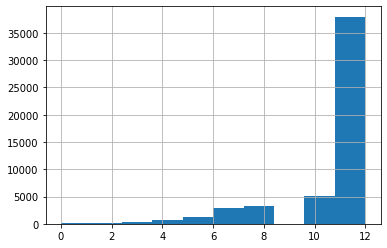

In [18]:
train["A1-rank"].hist()

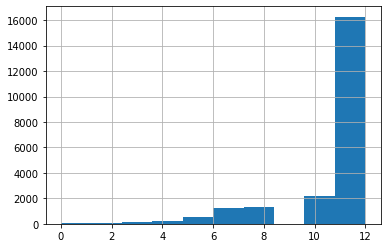

In [19]:
test["A1-rank"].hist()

In [ ]:
train["A4-weapon"].hist()

In [ ]:
for c in []